In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
dir(cifar10)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [ ]:
type(cifar10)

module

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],-1).astype("float32")/255.0
x_test=x_test.reshape(x_test.shape[0],-1).astype("float32")/255.0

In [ ]:
le = LabelEncoder()
#y_train_reshaped = y_train.argmax(axis=1)
y_train_1d = le.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
np.unique(y_train_1d)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
svm=SVC(kernel='linear',gamma='auto')
#cross_score = cross_val_score(svm,x_train,y_train,cv=2)
svm.fit(x_train,y_train_1d)
y_pred=svm.predict(x_test)

In [ ]:
print(cross_score)
print(cross_score.mean())

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(32,kernel_size=(2,2),activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(32,kernel_size=(2,2),activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Conv2D(64,kernel_size=(2,2),activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64,kernel_size=(2,2),activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Conv2D(128,kernel_size=(2,2),activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(128,kernel_size=(2,2),activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(150,activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10,),
    ]
)
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
graph = model.fit(x_train,y_train,epochs=200,verbose=2,batch_size=64, validation_data=(x_test,y_test))

Epoch 1/200
782/782 - 19s - loss: 1.5760 - accuracy: 0.4347 - val_loss: 1.5050 - val_accuracy: 0.4802 - 19s/epoch - 24ms/step
Epoch 2/200
782/782 - 8s - loss: 1.2207 - accuracy: 0.5644 - val_loss: 1.4074 - val_accuracy: 0.5016 - 8s/epoch - 10ms/step
Epoch 3/200
782/782 - 8s - loss: 1.0937 - accuracy: 0.6133 - val_loss: 1.1034 - val_accuracy: 0.6186 - 8s/epoch - 10ms/step
Epoch 4/200
782/782 - 8s - loss: 1.0167 - accuracy: 0.6459 - val_loss: 0.8582 - val_accuracy: 0.6958 - 8s/epoch - 10ms/step
Epoch 5/200
782/782 - 8s - loss: 0.9538 - accuracy: 0.6672 - val_loss: 0.8311 - val_accuracy: 0.7093 - 8s/epoch - 10ms/step
Epoch 6/200
782/782 - 8s - loss: 0.9169 - accuracy: 0.6827 - val_loss: 0.8305 - val_accuracy: 0.7119 - 8s/epoch - 10ms/step
Epoch 7/200
782/782 - 8s - loss: 0.8824 - accuracy: 0.6955 - val_loss: 0.7735 - val_accuracy: 0.7332 - 8s/epoch - 10ms/step
Epoch 8/200
782/782 - 8s - loss: 0.8508 - accuracy: 0.7053 - val_loss: 0.8259 - val_accuracy: 0.7151 - 8s/epoch - 10ms/step
Epoch 

In [ ]:
print('Final accuracy >>>>>>>>>>>>> ')
model.evaluate(x_test,y_test,batch_size=64,verbose=2)

Final accuracy >>>>>>>>>>>>> 
157/157 - 1s - loss: 0.4567 - accuracy: 0.8511 - 552ms/epoch - 4ms/step


[0.45667025446891785, 0.8511000275611877]

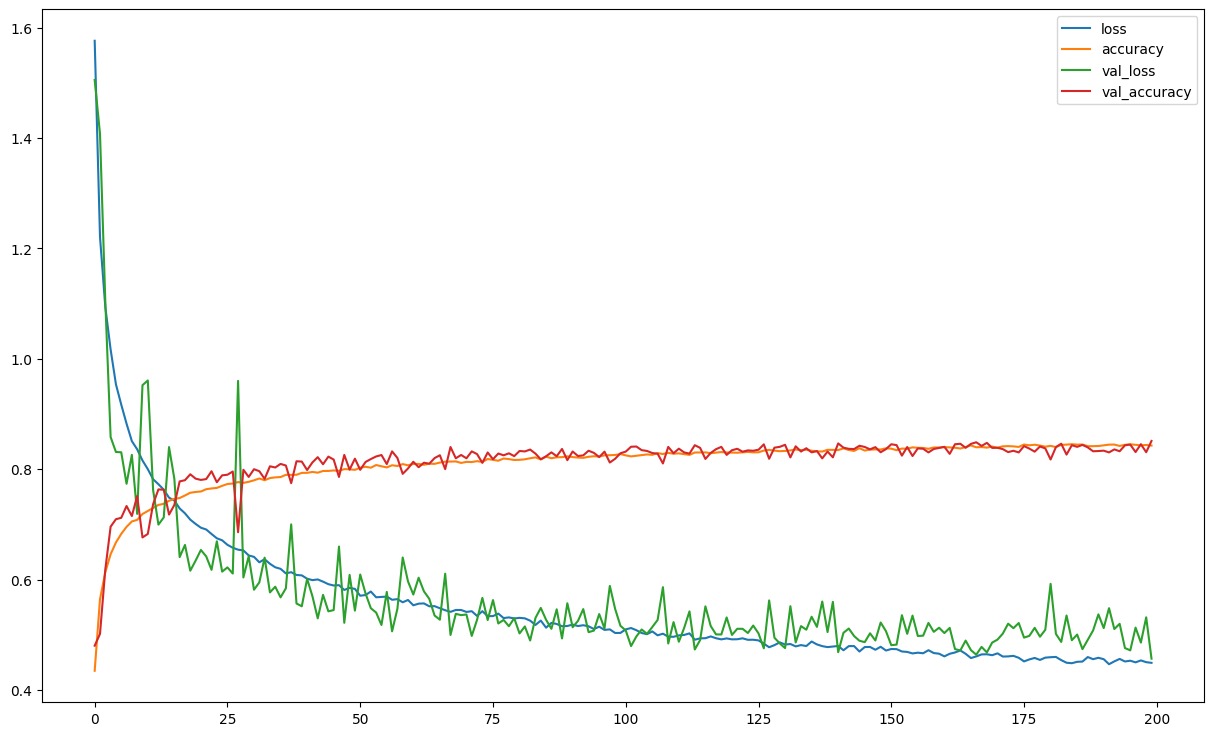

In [ ]:
pd.DataFrame(graph.history).plot(figsize=(15,9))
plt.show()

In [ ]:
category = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

313/313 [==============================] - 1s 3ms/step


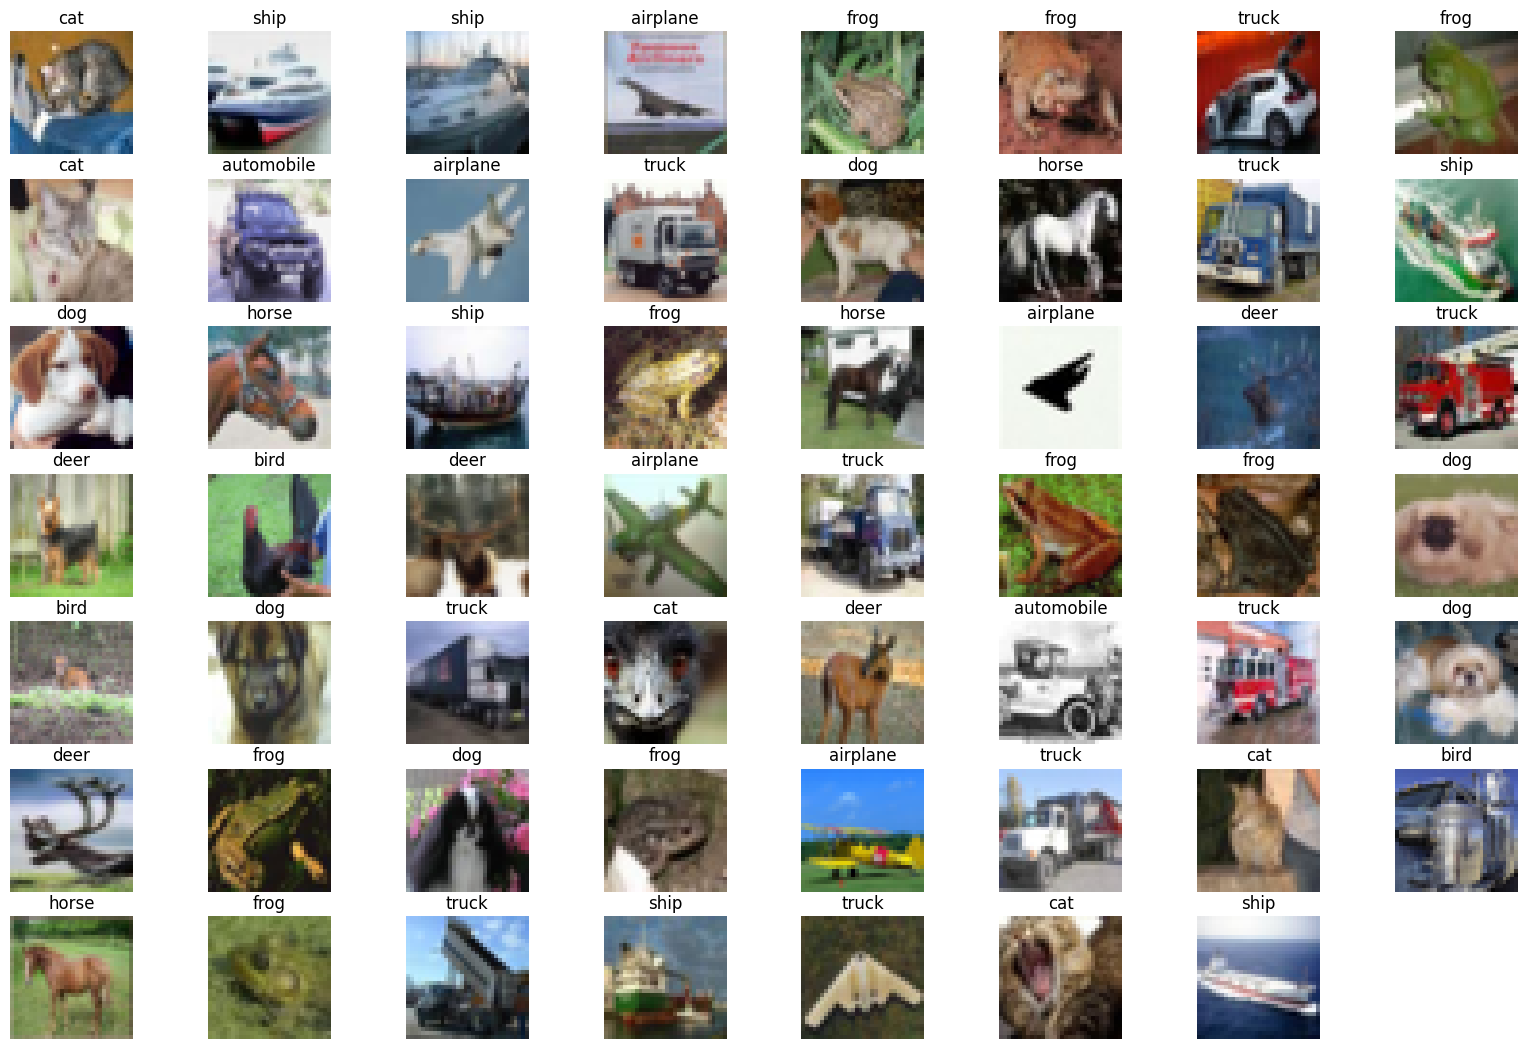

In [ ]:
y_pred = model.predict(x_test)
y_pred_labeled = [np.argmax(i) for i in y_pred]
x_test.reshape(-1,32,32,3)
plt.figure(figsize=(20,15))
for i in range(55):
    plt.subplot(8,8,i+1)
    plt.imshow(x_test[i])
    plt.title(f"{category[y_pred_labeled[i]]}")
    plt.axis("off")
plt.show()

In [ ]:
y_test_new = y_test[:len(y_pred_labeled)]
y_test_new = y_test_new.argmax(axis=1)
y_pred_labeled = np.array(y_pred_labeled)

In [ ]:
y_test_new.shape, y_pred_labeled.shape

((10000,), (10000,))

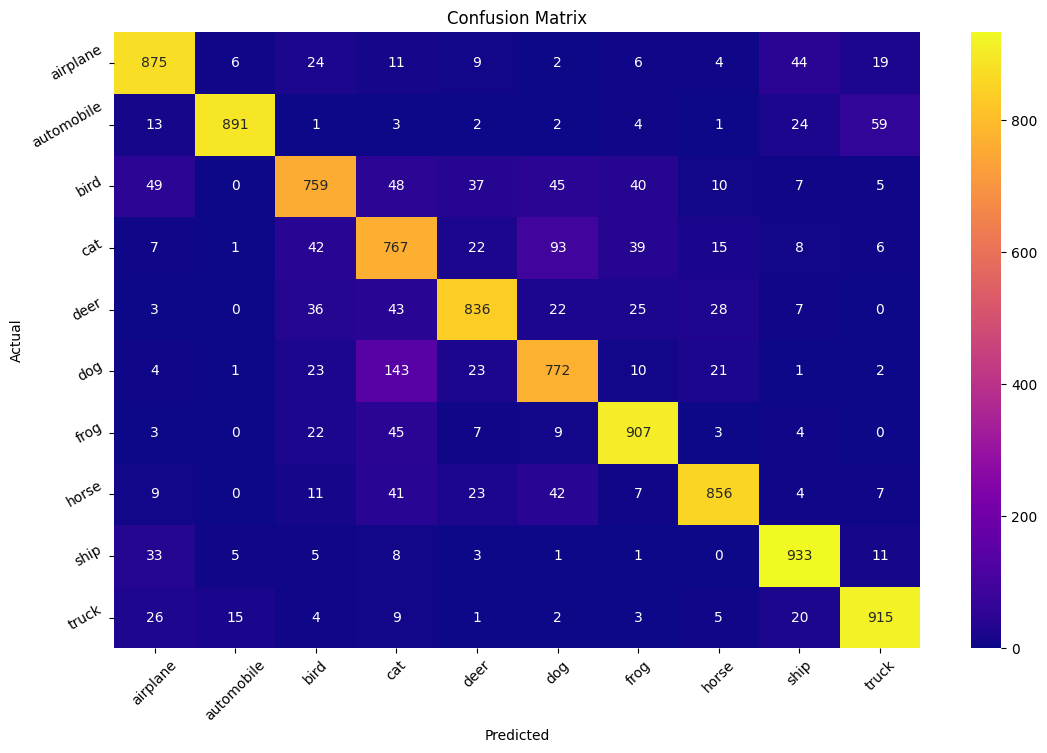

In [ ]:
import seaborn as sns
con = tf.math.confusion_matrix(y_test_new, y_pred_labeled)
plt.figure(figsize=(13,8))
sns.heatmap(con,annot=True,cmap='plasma',fmt='d', xticklabels=category, yticklabels=category)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=30)
plt.show()